In [1]:
!git clone https://github.com/nicknochnack/ImageClassification.git

Cloning into 'ImageClassification'...
remote: Enumerating objects: 312, done.
remote: Total 312 (delta 0), reused 0 (delta 0), pack-reused 312 (from 1)
Receiving objects: 100% (312/312), 106.29 MiB | 12.67 MiB/s, done.


In [2]:
!pip install tensorflow opencv-python

Removing Unsupported images

In [23]:
import cv2
import imghdr
import os
data_dir = "data"
img_exts = ['jpg','jpeg','bmp','png']
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    cv = cv2.imread(image_path)
    tip = imghdr.what(image_path)
    try:
      if tip not in img_exts:
        os.remove(image_path)
        print("Unsupported images are removed {}".format(image_path))
    except Exception as e:
      print("Issue with image {}".format(image_path))

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [82]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [62]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [64]:
happy_count = 0
sad_count = 0

# Iterate through the entire dataset
for images, labels in data:
   # Each batch contains images and labels
    happy_count += np.sum(labels.numpy() == 0)
    sad_count += np.sum(labels.numpy() == 1)
print(f"Total Happy images: {happy_count}")
print(f"Total Sad images: {sad_count}")

Total Happy images: 153
Total Sad images: 152


In [46]:
batch[0][:1]

array([[[[239.73633 , 239.73633 , 231.73633 ],
         [214.17188 , 214.17188 , 206.11328 ],
         [253.09766 , 253.09766 , 243.04883 ],
         ...,
         [197.68164 , 206.73047 , 151.48633 ],
         [193.17578 , 201.20508 , 152.0293  ],
         [200.92188 , 207.93164 , 165.86328 ]],

        [[247.30048 , 247.30048 , 239.30048 ],
         [220.6308  , 220.6308  , 212.5722  ],
         [243.912   , 243.912   , 233.89398 ],
         ...,
         [208.0982  , 216.51617 , 163.76468 ],
         [194.71474 , 202.72556 , 154.84845 ],
         [201.5589  , 207.94397 , 168.38672 ]],

        [[247.1695  , 247.55426 , 239.55426 ],
         [225.79141 , 226.18744 , 218.11758 ],
         [234.52037 , 235.2899  , 224.90514 ],
         ...,
         [198.89667 , 206.17596 , 157.55757 ],
         [190.68242 , 197.5394  , 153.11557 ],
         [206.45865 , 211.7049  , 175.54834 ]],

        ...,

        [[104.70238 , 142.85667 ,  87.77855 ],
         [ 81.21602 , 119.35904 ,  64.31473 ]

In [67]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

##Preprocessing Data

**Scaling Data**

In [83]:
data = data.map(lambda x,y:(x/256,y))
data.as_numpy_iterator().next()

(array([[[[0.29296875, 0.3125    , 0.2890625 ],
          [0.29364014, 0.3131714 , 0.2897339 ],
          [0.2966919 , 0.31622314, 0.29278564],
          ...,
          [0.35528564, 0.3435669 , 0.30841064],
          [0.3522339 , 0.34051514, 0.3053589 ],
          [0.3515625 , 0.33984375, 0.3046875 ]],
 
         [[0.29364014, 0.3125    , 0.2887268 ],
          [0.29428267, 0.31314254, 0.28936934],
          [0.2972033 , 0.31606317, 0.29228997],
          ...,
          [0.35426283, 0.34307122, 0.30773926],
          [0.3509488 , 0.3401506 , 0.3046875 ],
          [0.35021973, 0.33950806, 0.3040161 ]],
 
         [[0.2966919 , 0.3125    , 0.28720093],
          [0.2972033 , 0.3130114 , 0.28771234],
          [0.29952788, 0.315336  , 0.29003692],
          ...,
          [0.34961367, 0.34081817, 0.3046875 ],
          [0.34510756, 0.3384936 , 0.30163574],
          [0.3441162 , 0.33798218, 0.30096436]],
 
         ...,
 
         [[0.19213867, 0.18823242, 0.16870117],
          [0.19213

**Spliting Data**

In [85]:
train_size = int(len(data)*.7)
test_size = int(len(data)*.2)
val_size = int(len(data)*.1)

In [99]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

##Build Deep Learning Model

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [93]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.compile(
    'adam',
    loss = tf.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [94]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

##Training

In [97]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [100]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks =[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 460ms/step - accuracy: 0.4996 - loss: 1.0495 - val_accuracy: 0.4062 - val_loss: 0.6765
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 725ms/step - accuracy: 0.5678 - loss: 0.6421 - val_accuracy: 0.9062 - val_loss: 0.6208
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.7876 - loss: 0.6217 - val_accuracy: 0.8125 - val_loss: 0.4496
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 632ms/step - accuracy: 0.8043 - loss: 0.4969 - val_accuracy: 0.6875 - val_loss: 0.5553
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 708ms/step - accuracy: 0.8328 - loss: 0.4670 - val_accuracy: 0.8125 - val_loss: 0.4341
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.9013 - loss: 0.2896 - val_accuracy: 0.8750 - val_loss: 0.3564
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step - accuracy: 0.8703 - loss: 0.3053 - val_accuracy: 0.9375 - val_loss: 0.2828
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9631 - loss: 0.2042 - val_accuracy: 0.9375 - val_loss: 0

In [101]:
hist.history

{'accuracy': [0.5133928656578064,
  0.5357142686843872,
  0.7544642686843872,
  0.7678571343421936,
  0.875,
  0.8883928656578064,
  0.8839285969734192,
  0.9553571343421936,
  0.9776785969734192,
  0.9821428656578064,
  0.9776785969734192,
  0.9732142686843872,
  0.9866071343421936,
  0.9910714030265808,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  1.0],
 'loss': [0.9975782036781311,
  0.6454158425331116,
  0.6092528700828552,
  0.5072866082191467,
  0.43230682611465454,
  0.30609777569770813,
  0.27270105481147766,
  0.20706592500209808,
  0.11668576300144196,
  0.07064549624919891,
  0.07960808277130127,
  0.09065961837768555,
  0.059036459773778915,
  0.03505193442106247,
  0.016812589019536972,
  0.010299586690962315,
  0.01337225642055273,
  0.01355133019387722,
  0.013761733658611774,
  0.005543881561607122],
 'val_accuracy': [0.40625,
  0.90625,
  0.8125,
  0.6875,
  0.8125,
  0.875,
  0.9375,
  0.9375,
  1.0,
 

##Plot Performance

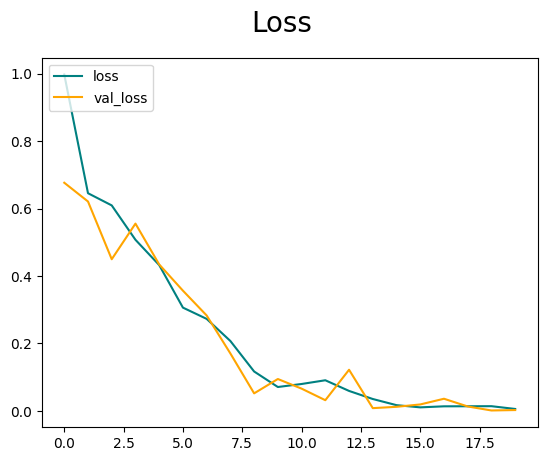

In [102]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

##Evaluate Performance

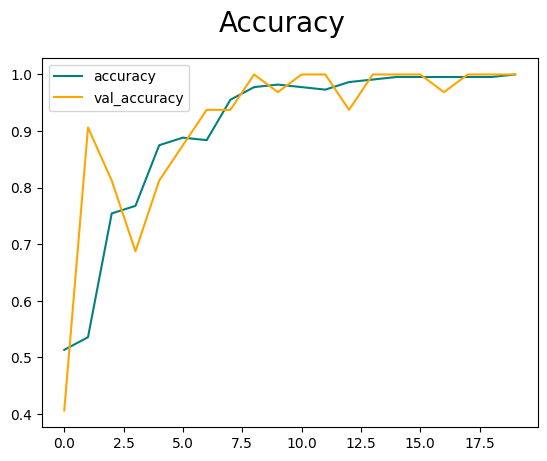

In [103]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#Evaluate

In [104]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [105]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [111]:
for batch in test.as_numpy_iterator():
  x,y = batch
  print(y)

[0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1]
[0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0]




#y->True value


#yhat->Predicted value

In [108]:
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


In [114]:
print("Precision:",pre.result().numpy(),"Recall:", re.result().numpy(),"Accuracy:", acc.result().numpy())

Precision: 1.0 Recall: 1.0 Accuracy: 1.0


#Test

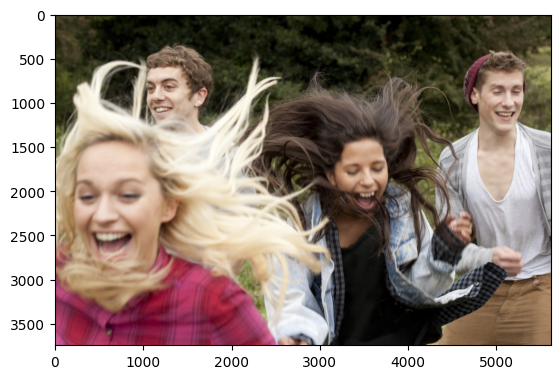

In [117]:
img = cv2.imread('154006829.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

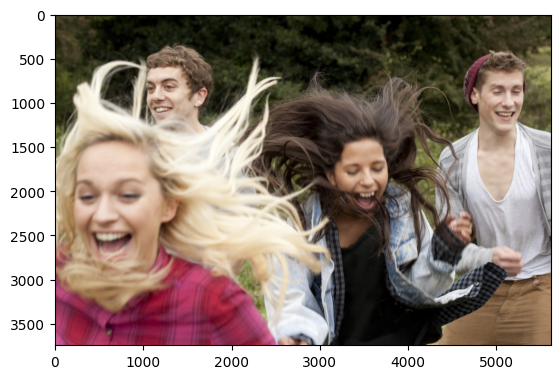

In [119]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [122]:
resize.shape

TensorShape([256, 256, 3])

In [121]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [124]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.05075922]], dtype=float32)

In [125]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


#Saving model

In [126]:
from tensorflow.keras.models import load_model

In [127]:
model.save(os.path.join('models','imageclassifier.h5'))

In [131]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [134]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted class is Happy
